In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

Connect Google Drive for accessing data files

In [7]:
#from google.colab import drive
#drive.mount('/content/gdrive')

os.chdir('/Users/michelleyuu/Desktop/data255/project/archive/Tess')
dir_path = '/Users/michelleyuu/Desktop/data255/project/archive/Tess'


In [ ]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/Shareddrives/DATA255/Tess"

In [ ]:
#changing the working directory
#%cd /content/gdrive/Shareddrives/DATA255/Tess/

/content/gdrive/Shareddrives/DATA255/Tess


Import necessary libraries

In [4]:
import IPython.display as ipd #Allows Audio files to be played directly in the notebook
import librosa #library we will to analyze sounds
import librosa.display #library module which helps visualize the waves

In [5]:
import os
import glob
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [6]:
print(os.getcwd())

/Users/michelleyuu/Desktop/data255/project/archive/Tess


Get paths of all audio files into a list

In [8]:
paths = []
labels = []
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [9]:
len(paths)

2800

In [10]:
paths[:5] #Contains path of all audios

['/Users/michelleyuu/Desktop/data255/project/archive/Tess/YAF_disgust/YAF_date_disgust.wav',
 '/Users/michelleyuu/Desktop/data255/project/archive/Tess/YAF_disgust/YAF_rag_disgust.wav',
 '/Users/michelleyuu/Desktop/data255/project/archive/Tess/YAF_disgust/YAF_raise_disgust.wav',
 '/Users/michelleyuu/Desktop/data255/project/archive/Tess/YAF_disgust/YAF_ditch_disgust.wav',
 '/Users/michelleyuu/Desktop/data255/project/archive/Tess/YAF_disgust/YAF_door_disgust.wav']

In [11]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [12]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/Users/michelleyuu/Desktop/data255/project/arc...,disgust
1,/Users/michelleyuu/Desktop/data255/project/arc...,disgust
2,/Users/michelleyuu/Desktop/data255/project/arc...,disgust
3,/Users/michelleyuu/Desktop/data255/project/arc...,disgust
4,/Users/michelleyuu/Desktop/data255/project/arc...,disgust


In [13]:
df['label'].value_counts()

angry      400
neutral    400
disgust    400
fear       400
sad        400
happy      400
ps         400
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

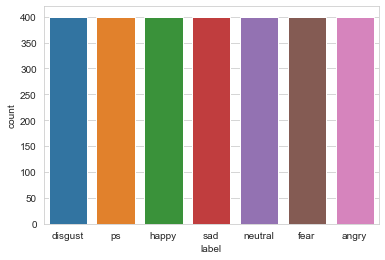

In [14]:
sns.countplot(df['label'])

In [15]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

AttributeError: module 'librosa.display' has no attribute 'waveplot'

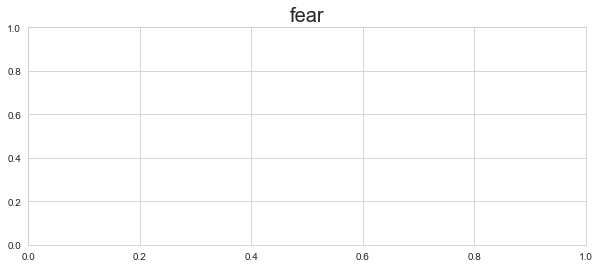

In [16]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

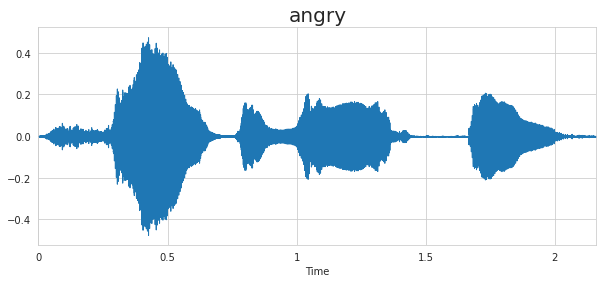

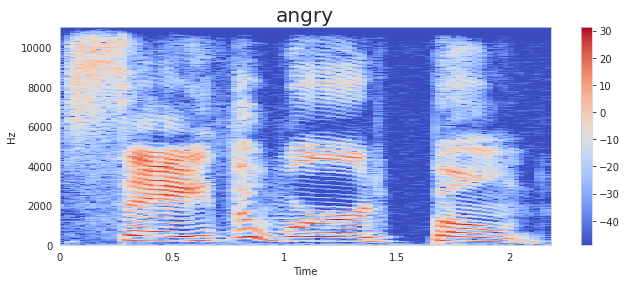

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

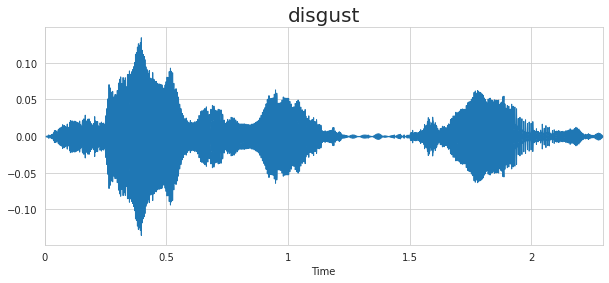

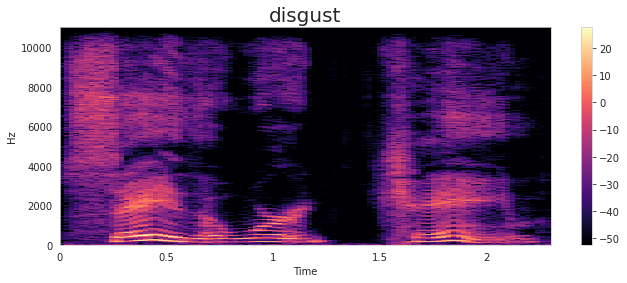

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

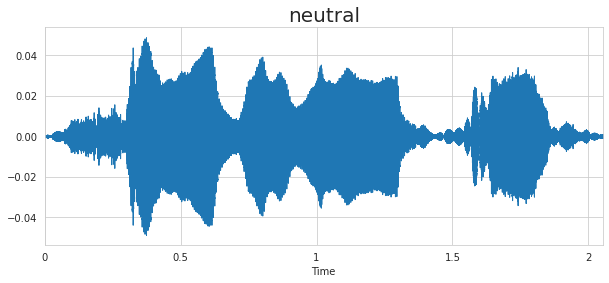

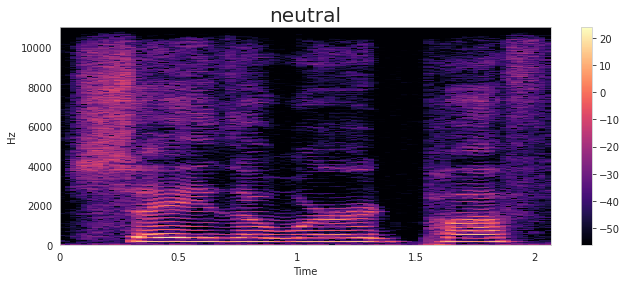

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

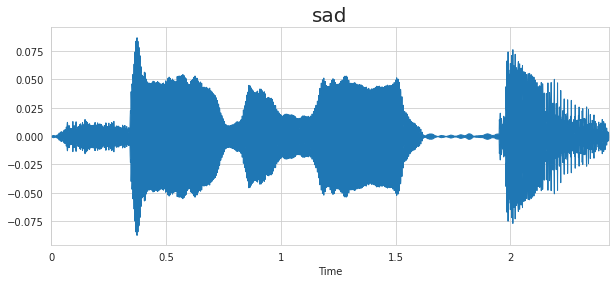

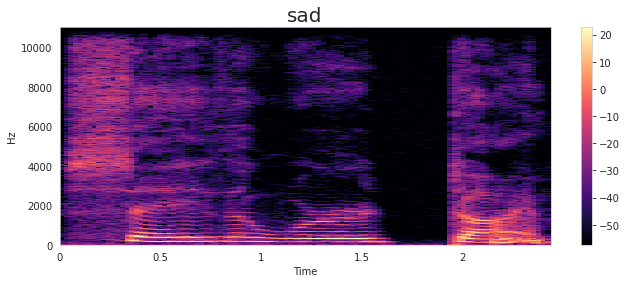

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

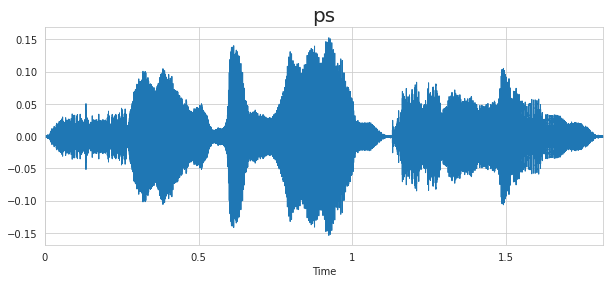

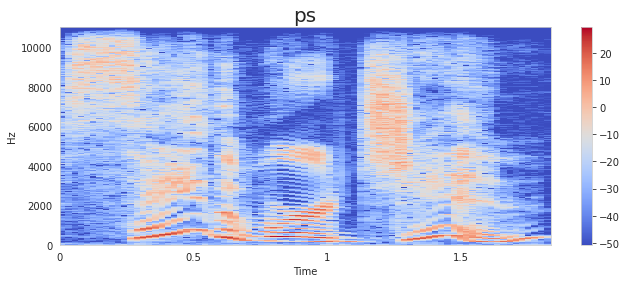

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

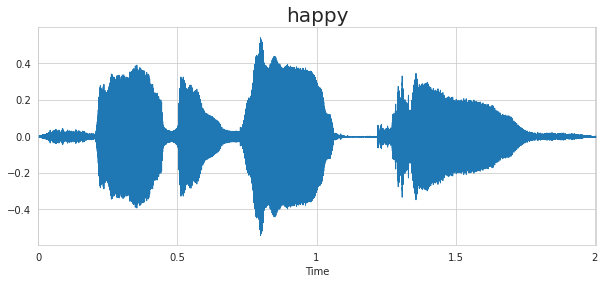

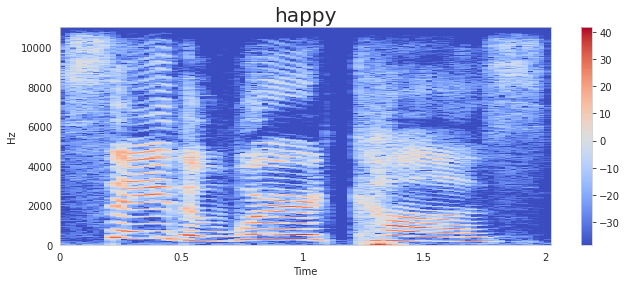

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-446.78256   ,   74.39871   ,    0.93883014,   41.23846   ,
         -9.068007  ,   -2.3158646 ,   -7.2964206 ,  -16.591272  ,
         -6.2185287 ,  -12.809085  ,   -7.9846215 ,    7.4179664 ,
        -11.029167  ,    3.7645698 ,   -1.5487139 ,   -5.0804515 ,
          3.7315693 ,   -0.61437947,   -9.599797  ,    2.6504536 ,
         -8.202088  ,    1.084385  ,   -4.109656  ,    0.77367413,
         -2.3860736 ,   -1.456057  ,   -3.129753  ,    3.1679466 ,
         -3.3426936 ,    4.7926135 ,   -1.1568016 ,    4.4688935 ,
          1.50645   ,    4.0424323 ,    4.1196256 ,    3.2868464 ,
          3.3547688 ,    4.276562  ,    2.1326396 ,    2.412239  ],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-446.78256, 74.39871, 0.93883014, 41.23846, -...
1       [-383.76895, 108.726204, -18.156107, 16.471544...
2       [-404.43842, 87.80963, -0.1130482, 22.820822, ...
3       [-445.1764, 68.08045, -4.372026, 31.874928, -1...
4       [-430.64407, 119.090355, 6.6189656, 5.5501122,...
                              ...                        
2795    [-575.1544, 96.21219, 34.30486, 17.375154, 17....
2796    [-558.3176, 90.45798, 33.067997, 15.927434, 22...
2797    [-527.5091, 115.90814, 25.528826, 8.281075, 18...
2798    [-560.9461, 121.552605, 40.01258, -1.6639067, ...
2799    [-553.12195, 107.39179, 34.475883, 8.756948, 2...
Name: speech, Length: 2800, dtype: object

In [ ]:
#X_mfcc.to_csv (r'/content/gdrive/Shareddrives/DATA255/mfcc_Tess.csv', index = None, header=False) 

In [41]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [42]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

scaler = StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0,1))

X_s = scaler.fit_transform(X)

In [28]:
## input split
X = np.expand_dims(X_s, -1)
X.shape

(2800, 40, 1)

In [43]:
X.shape

(2800, 40)

In [44]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [45]:
y = y.toarray()

In [46]:
y.shape

(2800, 7)

In [47]:
#DataFlair - Split the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(np.array(X), y, test_size=0.25, random_state=9)

In [66]:
import tensorflow
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Dense, Embedding, LSTM
from keras.utils import np_utils
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.initializers import RandomNormal, Constant
from sklearn.neural_network import MLPClassifier

tensorflow.keras.backend.clear_session()

mlp=MLPClassifier(solver='adam', batch_size=64, 
                  hidden_layer_sizes= (400, 350, 300, 250, 200, 150, 100, 50), 
                  activation = 'relu', learning_rate='adaptive', learning_rate_init=0.005, 
                  max_iter=500, verbose = 1)

In [67]:
# Train the model
mlp.fit(x_train,y_train)

# Predict for the test set
y_pred=mlp.predict(x_test)

Iteration 1, loss = 6.07314436
Iteration 2, loss = 2.09585763
Iteration 3, loss = 1.41212823
Iteration 4, loss = 1.08326882
Iteration 5, loss = 1.20972514
Iteration 6, loss = 1.06265399
Iteration 7, loss = 0.53294245
Iteration 8, loss = 0.57579433
Iteration 9, loss = 0.50251537
Iteration 10, loss = 0.21355936
Iteration 11, loss = 0.16437142
Iteration 12, loss = 0.18238428
Iteration 13, loss = 0.12114715
Iteration 14, loss = 0.16136244
Iteration 15, loss = 0.16609502
Iteration 16, loss = 0.44017102
Iteration 17, loss = 0.40632417
Iteration 18, loss = 0.15764013
Iteration 19, loss = 0.15085512
Iteration 20, loss = 0.25233095
Iteration 21, loss = 0.18555301
Iteration 22, loss = 0.65562945
Iteration 23, loss = 0.98731609
Iteration 24, loss = 0.33476972
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [69]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 95.86%


In [79]:
tensorflow.keras.backend.clear_session()

model = models.Sequential() 
model.add(Conv1D(filters = 64, kernel_size = 4, padding = 'same', input_shape=(x_train.shape[1],1)))

model.add(Conv1D(filters = 64, kernel_size = 4, padding = 'same', activation="relu"))

model.add(layers.ZeroPadding1D(padding = 1))
model.add(MaxPooling1D(pool_size=2, padding='same', strides = 1))

model.add(Dropout(0.50))

model.add(Flatten())

model.add(Dense(64, activation = "relu"))

#model.add(Dropout(0.20))

model.add(layers.Dense(y.shape[1], activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"]) #rmsprop
model.summary() 

#traditional machine learning methods - classification
#number of layers/neruons

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            320       
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 64)            16448     
                                                                 
 zero_padding1d (ZeroPadding  (None, 42, 64)           0         
 1D)                                                             
                                                                 
 max_pooling1d (MaxPooling1D  (None, 42, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 42, 64)            0         
                                                                 
 flatten (Flatten)           (None, 2688)              0

In [72]:
earlystopping = EarlyStopping(monitor ="val_acc",
                              mode = 'max', 
                              patience = 10,
                              verbose = 1,
                              restore_best_weights = True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=10,
                                            verbose=1,
                                            factor=0.05,
                                            min_lr=0.00001)

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [80]:
EPOCHS = 100
batch_size = 16

history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=EPOCHS, batch_size=batch_size,
                    callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/100
132/132 [==============================] - 1s 6ms/step - loss: 1.5054 - acc: 0.7262 - val_loss: 0.1466 - val_acc: 0.9529 - lr: 0.0010
Epoch 2/100
132/132 [==============================] - 1s 5ms/step - loss: 0.1685 - acc: 0.9414 - val_loss: 0.1409 - val_acc: 0.9500 - lr: 0.0010
Epoch 3/100
132/132 [==============================] - 1s 6ms/step - loss: 0.1085 - acc: 0.9624 - val_loss: 0.0494 - val_acc: 0.9829 - lr: 0.0010
Epoch 4/100
132/132 [==============================] - 1s 5ms/step - loss: 0.0912 - acc: 0.9652 - val_loss: 0.0683 - val_acc: 0.9771 - lr: 0.0010
Epoch 5/100
132/132 [==============================] - 1s 6ms/step - loss: 0.0864 - acc: 0.9710 - val_loss: 0.1243 - val_acc: 0.9629 - lr: 0.0010
Epoch 6/100
132/132 [==============================] - 1s 5ms/step - loss: 0.0805 - acc: 0.9748 - val_loss: 0.0527 - val_acc: 0.9857 - lr: 0.0010
Epoch 7/100
132/132 [==============================] - 1s 6ms/step - loss: 0.0542 - acc: 0.9824 - val_loss: 0.0473 - val_acc

22/22 [==============================] - 0s 2ms/step - loss: 0.0079 - acc: 0.9971
Accuracy of our model on test data :  99.71428513526917 %


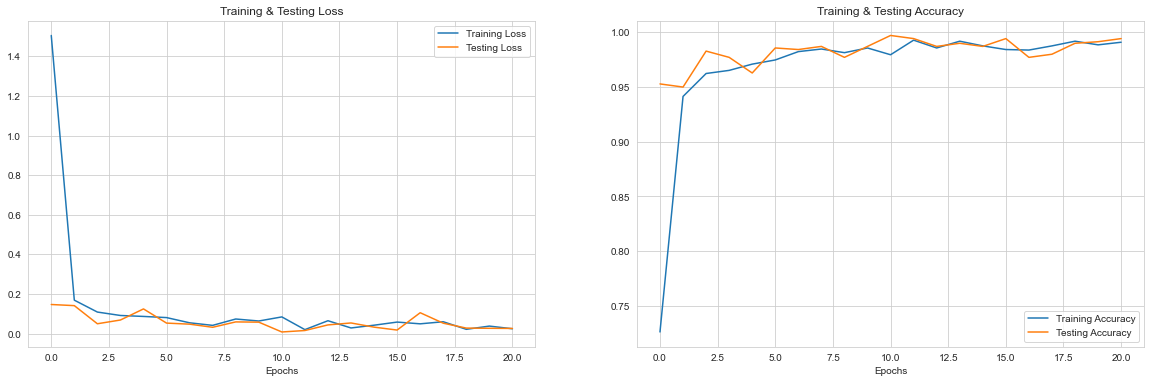

In [81]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
test_acc = history.history['val_acc']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [36]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
27/27 [==============================] - 10s 267ms/step - loss: 0.2624 - accuracy: 0.9435 - val_loss: 0.0559 - val_accuracy: 0.9833
Epoch 2/50
27/27 [==============================] - 8s 294ms/step - loss: 0.1003 - accuracy: 0.9732 - val_loss: 0.0827 - val_accuracy: 0.9762
Epoch 3/50
27/27 [==============================] - 8s 284ms/step - loss: 0.0907 - accuracy: 0.9762 - val_loss: 0.0398 - val_accuracy: 0.9857
Epoch 4/50
27/27 [==============================] - 7s 256ms/step - loss: 0.0477 - accuracy: 0.9857 - val_loss: 0.0850 - val_accuracy: 0.9786
Epoch 5/50
27/27 [==============================] - 6s 240ms/step - loss: 0.0421 - accuracy: 0.9887 - val_loss: 0.0210 - val_accuracy: 0.9929
Epoch 6/50
27/27 [==============================] - 7s 240ms/step - loss: 0.0190 - accuracy: 0.9929 - val_loss: 0.0201 - val_accuracy: 0.9929
Epoch 7/50
27/27 [==============================] - 7s 247ms/step - loss: 0.0223 - accuracy: 0.9917 - val_loss: 0.0415 - val_accuracy: 0.9833
Epoch

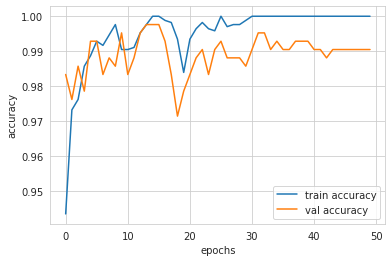

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

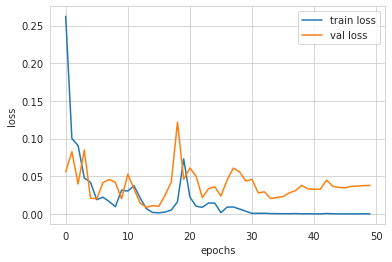

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
# Calculate the accuracy of our model

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_true=np.argmax(y_test, axis=1), y_pred=np.argmax(y_pred, axis=1))

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 99.14%
